# Random Density Matrix

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import quantum_info

import warnings
warnings.filterwarnings('ignore')

## Entropy of a random density matrix

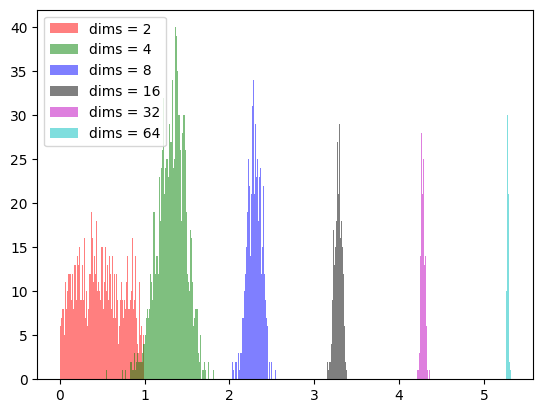

In [11]:
dims_list = 2**np.arange(1, 7)
color_list = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

for dims in dims_list:
    entropy_list = []
    for i in range(1, 10**3):
        random_density_matrix = quantum_info.states.random.random_density_matrix(dims, rank=None, method='Hilbert-Schmidt',seed=None) # method='Bures'
        entropy_list.append(quantum_info.entropy(random_density_matrix, base=2))

    plt.hist(entropy_list, bins=100, color=color_list[int(np.log2(dims))-1], alpha=0.5, label='dims = %d' % dims)
plt.legend()
plt.show()

## Purity of a random density matrix

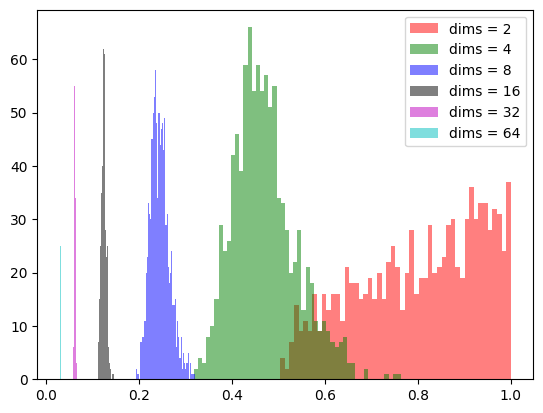

In [3]:
dims_list = 2**np.arange(1, 7)
color_list = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

for dims in dims_list:
    purity_list = []
    for i in range(1, 10**3):
        random_density_matrix = quantum_info.states.random.random_density_matrix(dims, rank=None, method='Hilbert-Schmidt',seed=None)
        purity_list.append(quantum_info.purity(random_density_matrix))

    plt.hist(purity_list, bins=50, color=color_list[int(np.log2(dims))-1], alpha=0.5, label='dims = %d' % dims)
plt.legend()
plt.show()

Comfirm $\log\text{Tr}\rho^2 \geq \text{Tr}[\rho\log\rho]$.

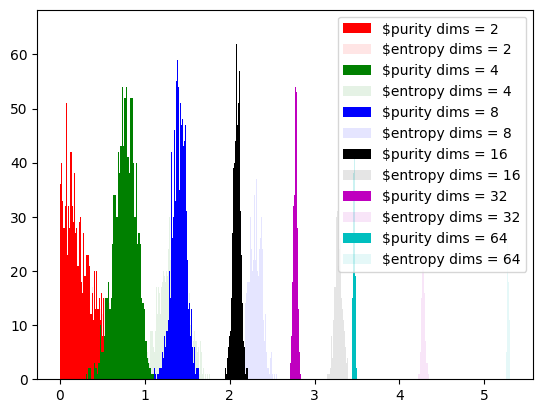

In [19]:
dims_list = 2**np.arange(1, 7)
color_list = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

for dims in dims_list:
    purity_list = []
    for i in range(1, 10**3):
        random_density_matrix = quantum_info.states.random.random_density_matrix(dims, rank=None, method='Hilbert-Schmidt',seed=None)
        purity_list.append(-np.log(quantum_info.purity(random_density_matrix)))

    entropy_list = []
    for i in range(1, 10**3):
        random_density_matrix = quantum_info.states.random.random_density_matrix(dims, rank=None, method='Hilbert-Schmidt',seed=None) # method='Bures'
        entropy_list.append(quantum_info.entropy(random_density_matrix, base=2))

    plt.hist(purity_list, bins=50, color=color_list[int(np.log2(dims))-1], alpha=1, label='$purity dims = %d' % dims)
    plt.hist(entropy_list, bins=100, color=color_list[int(np.log2(dims))-1], alpha=0.1, label='$entropy dims = %d' % dims)
plt.legend()
plt.show()

## Purity of a random density matrix after partial trace

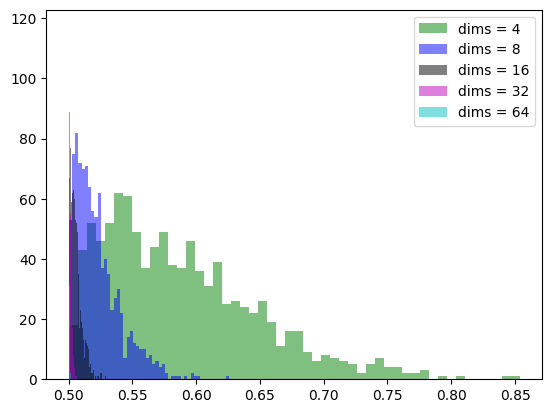

In [4]:
dims_list = 2**np.arange(2, 7)
color_list = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

for dims in dims_list:
    purity_list = []
    for i in range(1, 10**3):
        random_density_matrix = quantum_info.states.random.random_density_matrix(dims, rank=None, method='Hilbert-Schmidt',seed=None)

        n = int(np.log2(dims))
        random_density_matrix = quantum_info.partial_trace(random_density_matrix, list(np.arange(n - 1)))
        purity_list.append(quantum_info.purity(random_density_matrix))

    plt.hist(purity_list, bins=50, color=color_list[int(np.log2(dims))-1], alpha=0.5, label='dims = %d' % dims)
plt.legend()
plt.show()

## Entropy of random pure state after partial trace

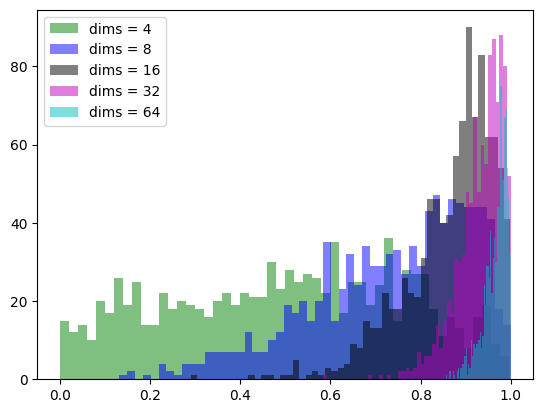

In [6]:
dims_list = 2**np.arange(2, 7)
color_list = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

for dims in dims_list:
    entropy_list = []
    for i in range(1, 10**3):
        random_unitary = quantum_info.random_unitary(dims)
        initial_state_matrix = np.zeros((dims, dims)); initial_state_matrix[0, 0] = 1
        random_pure_density_matrix = random_unitary @ initial_state_matrix @ random_unitary.adjoint()
        random_pure_density_matrix = quantum_info.DensityMatrix(random_pure_density_matrix)

        n = int(np.log2(dims))
        random_pure_density_matrix = quantum_info.partial_trace(random_pure_density_matrix, list(np.arange(n - 1)))
        entropy_list.append(quantum_info.entropy(random_pure_density_matrix, base=2))

    plt.hist(entropy_list, bins=50, color=color_list[int(np.log2(dims))-1], alpha=0.5, label='dims = %d' % dims)
plt.legend()
plt.show()

## Purity of random pure state after partial trace

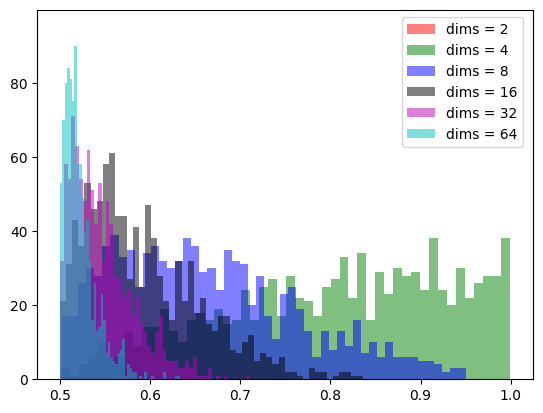

In [7]:
dims_list = 2**np.arange(1, 7)
color_list = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

for dims in dims_list:
    purity_list = []
    for i in range(1, 10**3):
        random_unitary = quantum_info.random_unitary(dims)
        initial_state_matrix = np.zeros((dims, dims)); initial_state_matrix[0, 0] = 1
        random_pure_density_matrix = random_unitary @ initial_state_matrix @ random_unitary.adjoint()
        random_pure_density_matrix = quantum_info.DensityMatrix(random_pure_density_matrix)

        n = int(np.log2(dims))
        traced_random_pure_density_matrix = quantum_info.partial_trace(random_pure_density_matrix, list(np.arange(n - 1)))
        purity_list.append(quantum_info.purity(traced_random_pure_density_matrix))

    plt.hist(purity_list, bins=50, color=color_list[int(np.log2(dims))-1], alpha=0.5, label='dims = %d' % dims)
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0, fontsize=10)
plt.show()